## Project - Bank Churn prediction

 
### In this project, we aim to predict the churn for a bank, i.e, given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?

### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 
### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modelingPoints 

### Distribution:
The points distribution for this case is as follows:
- 1. Read the dataset
- 2. Drop the columns which are unique for all users like IDs (5 points)
- 3. Distinguish the feature and target set (5 points)
- 4. Divide the data set into trainingand test sets (5 points)
- 5. Normalize the train and test data(10points)
- 6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)
- 7. Predict the results using 0.5 as a threshold (10points)8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
!pip install tensorflow==2.3

     |████████████████████████████████| 320.4MB 53kB/s 
     |████████████████████████████████| 460kB 36.3MB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
!pip install hiplot
!pip install shap
!pip install keras
!pip install -U keras-tuner

     |████████████████████████████████| 696kB 5.8MB/s 
     |████████████████████████████████| 788kB 34.5MB/s 
     |████████████████████████████████| 358kB 22.2MB/s 
     |████████████████████████████████| 368kB 34.8MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.16 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


     |████████████████████████████████| 358kB 4.3MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489386 sha256=6da97b2941333336e8759707b61aacb37b23b8b328325984c0e89849571cb4ab
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=764ea09827984867e0816895389f5b0c505e5ba9846774212e728a96147e0f08
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=e65f700e3ff4a39301bd986e551ca32192cf9afad4fbdac781b446e2bcb65c84
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,roc_auc_score,roc_curve,classification_report
import numpy as np
from tensorflow.keras.models import Sequential, save_model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Read the dataset

In [7]:
ds = pd.read_csv("/content/drive/My Drive/GL_Mentor/Data/bank.csv")

In [9]:
ds.head(10)
# 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
ds.describe(include='all').T
#Scaling, Remove ID Columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000,NaN,NaN,NaN,5000.5,2886.9,1,2500.75,5000.5,7500.25,10000
CustomerId,10000,NaN,NaN,NaN,1.56909e+07,71936.2,1.55657e+07,1.56285e+07,1.56907e+07,1.57532e+07,1.58157e+07
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4


In [12]:
ds['CustomerId'].value_counts() 

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

In [13]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
ds['Surname'].value_counts()  
#Think of including a variable from Ethical perspective as well that ML system doesnt end up Profiling

Smith           32
Scott           29
Martin          29
Walker          28
Brown           26
                ..
Micco            1
Chubb            1
Reyes            1
Howell-Price     1
Chiwetelu        1
Name: Surname, Length: 2932, dtype: int64

#### Drop the columns which are unique for all users like IDs

In [15]:
#RowNumber #CustomerId and #Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
ds.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Numeric -  CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
# Categorical - Geography,Gender,HasCrCard, IsActiveMember,Exited

# Univariate Analysis

In [18]:
ds.skew().sort_values(ascending=False)

Exited             1.471611
Age                1.011320
NumOfProducts      0.745568
Tenure             0.010991
EstimatedSalary    0.002085
IsActiveMember    -0.060437
CreditScore       -0.071607
Balance           -0.141109
HasCrCard         -0.901812
dtype: float64

In [19]:
ds.kurt().sort_values(ascending=False)

Age                1.395347
NumOfProducts      0.582981
Exited             0.165671
CreditScore       -0.425726
Tenure            -1.165225
EstimatedSalary   -1.181518
HasCrCard         -1.186973
Balance           -1.489412
IsActiveMember    -1.996747
dtype: float64

CreditScore


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


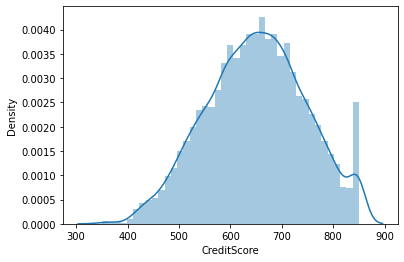

Age


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


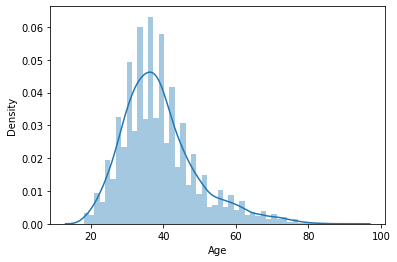

Tenure


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


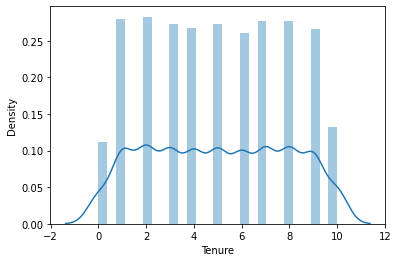

Balance


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


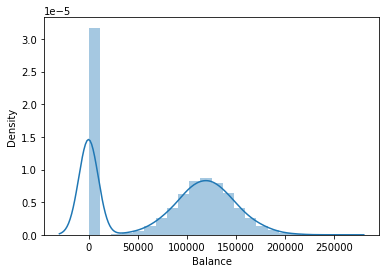

NumOfProducts


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


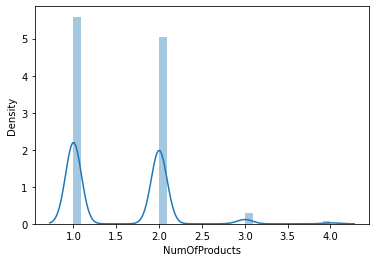

EstimatedSalary


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


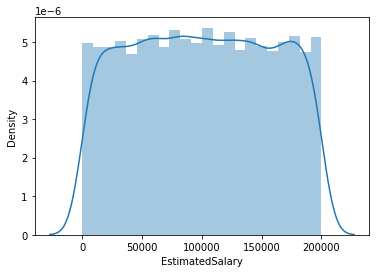

HasCrCard


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


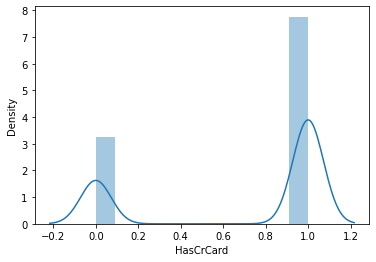

IsActiveMember


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


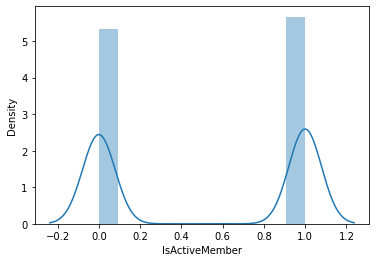

In [20]:
# Distribution Plots for Continous Variables
for i,col in enumerate(['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','HasCrCard', 'IsActiveMember']):
    print(col)
    sns.distplot(ds[col])
    plt.show()

#HasCrCard & IsActiveMember are categorical

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


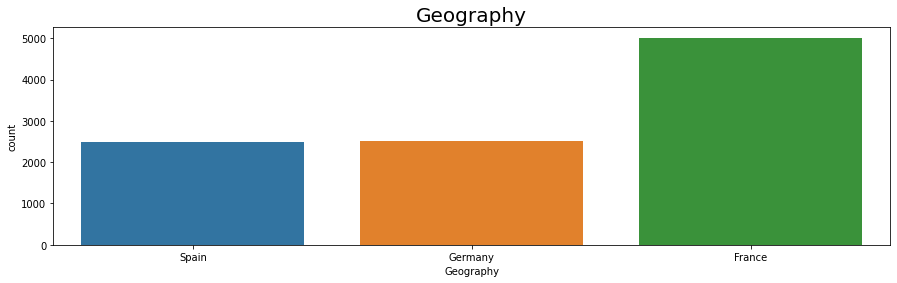

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


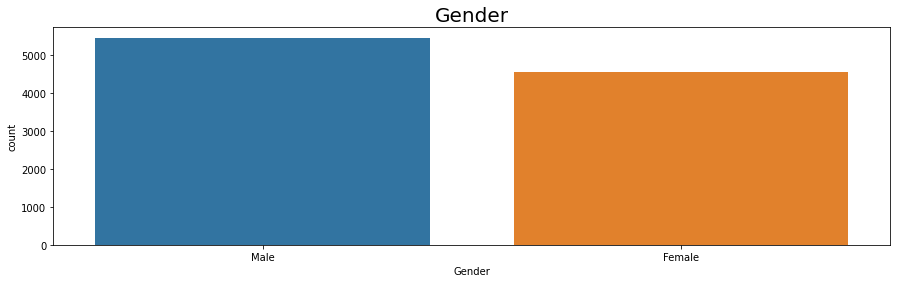

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


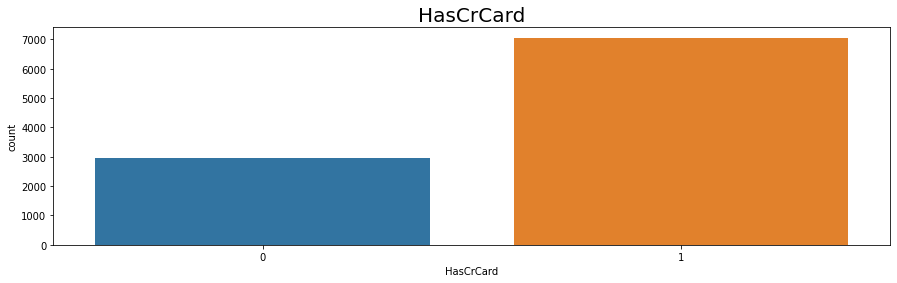

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


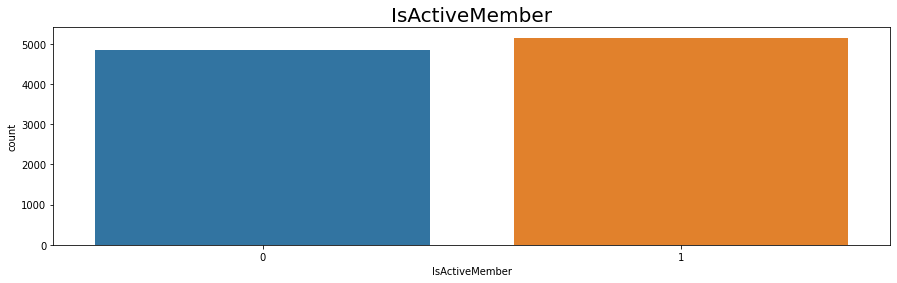

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


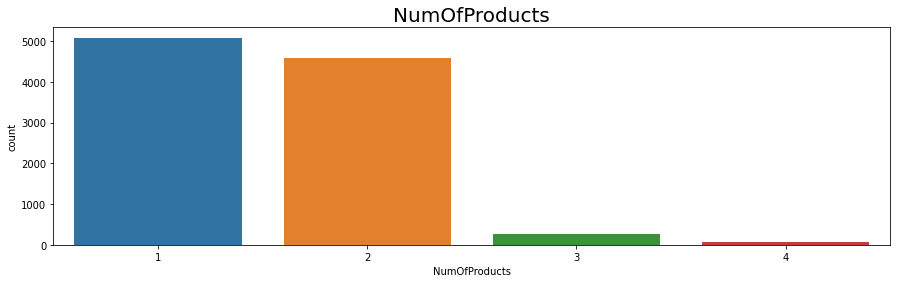

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


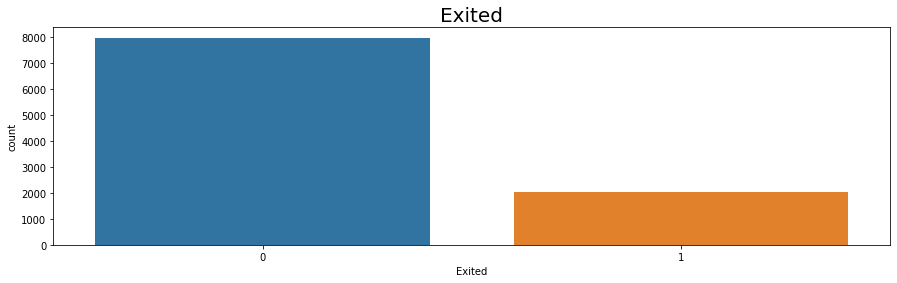

In [21]:
# Plot total counts for all categorical features
for feature in ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Exited']:
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.countplot(ds[feature].sort_values(ascending=False))
    plt.xticks(fontsize=10);
    plt.title(feature,fontsize=20)
    plt.show()


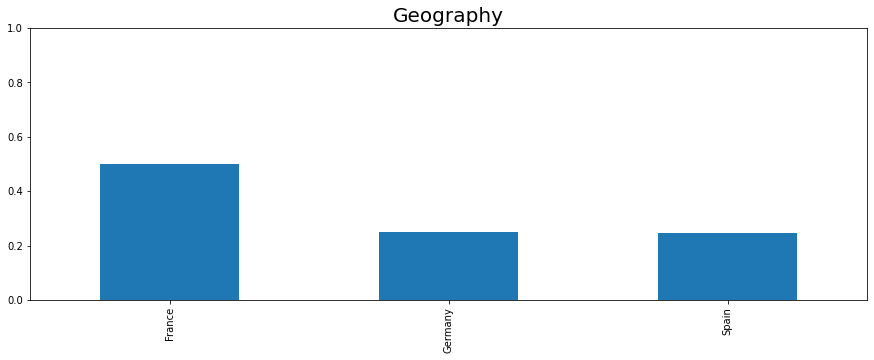

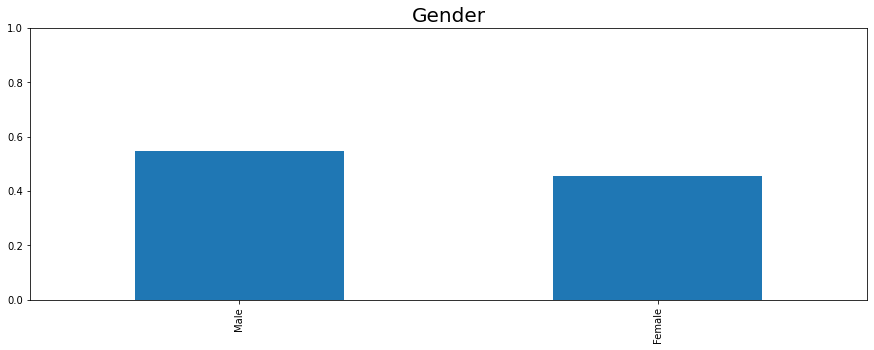

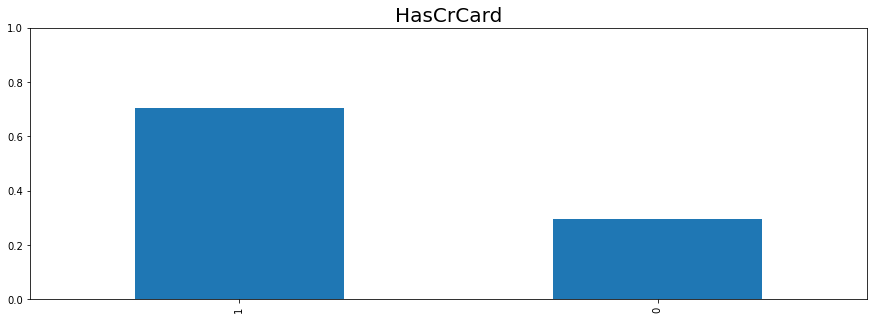

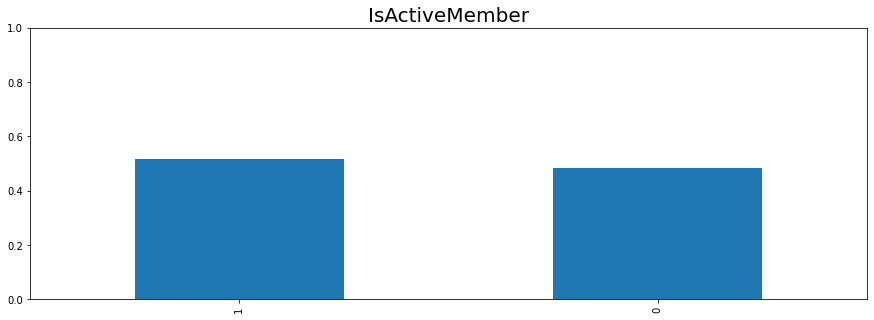

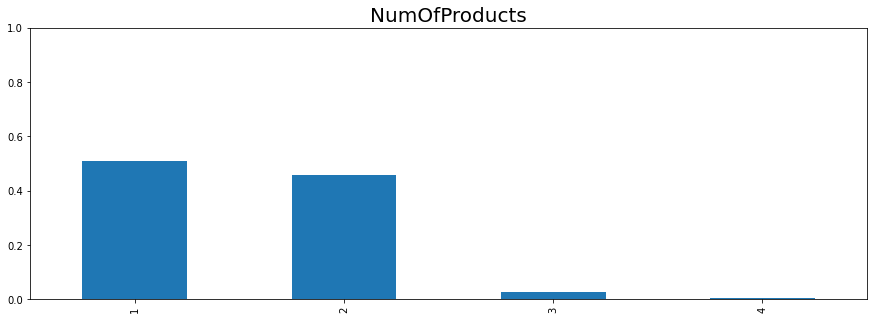

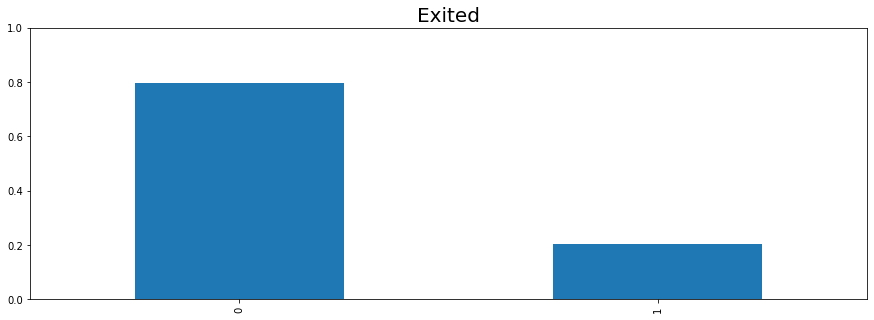

In [22]:
# Plot value counts (proportions) for all categorical features
for feature in ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts','Exited']:
    ds[feature].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(15,5))
    plt.ylim(0,1)
    plt.xticks(fontsize=10);
    plt.title(feature,fontsize=20)
    plt.show()

# Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


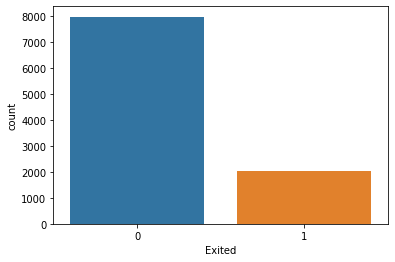

In [23]:
sns.countplot(ds['Exited'])
#Imbalanced - Important to choose Precision vs Recall, Choose Precision as focus on predicting Churners more with an Imbalanced dataset towards Non Churners so focus to reduce FP
# Predict all non churners still have 80% accuracy, but not learning much all so model perform better than baseline

In [24]:
ds['Exited'].value_counts()/ds.shape[0]*100

0    79.63
1    20.37
Name: Exited, dtype: float64

Geography




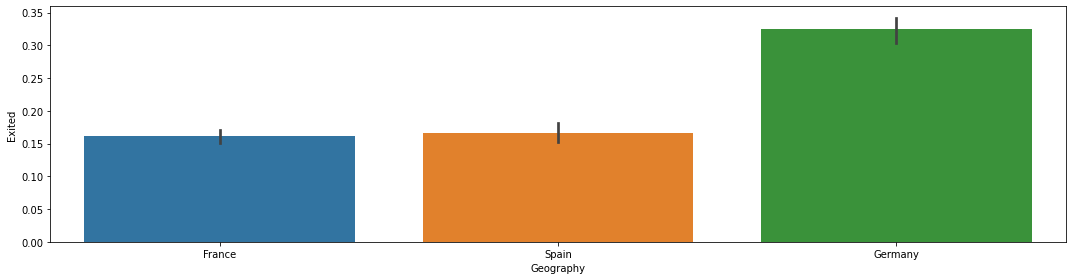

Gender




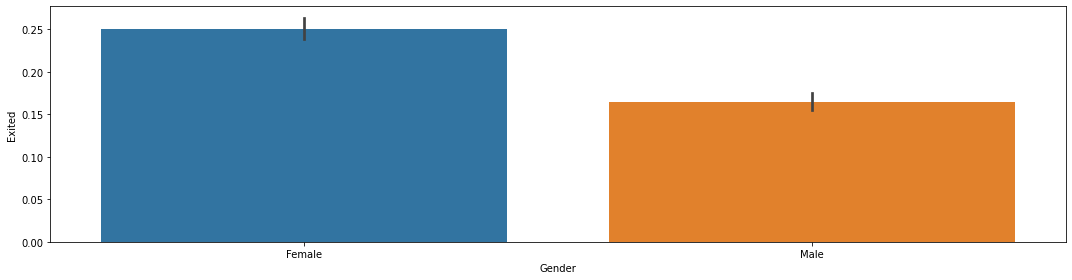

HasCrCard




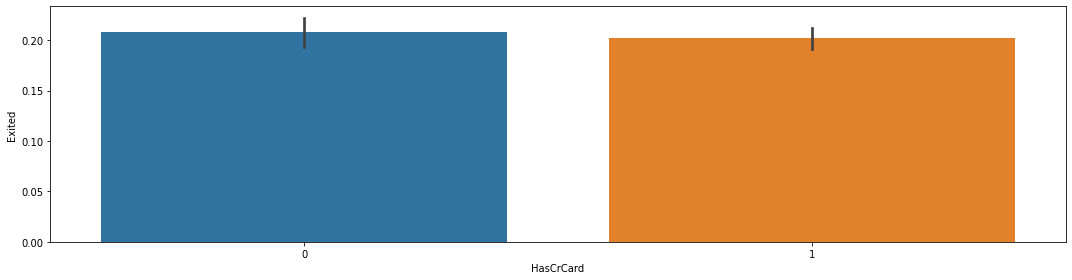

IsActiveMember




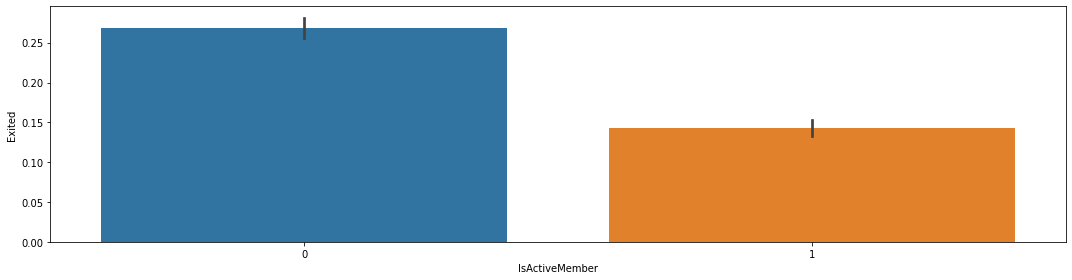

NumOfProducts




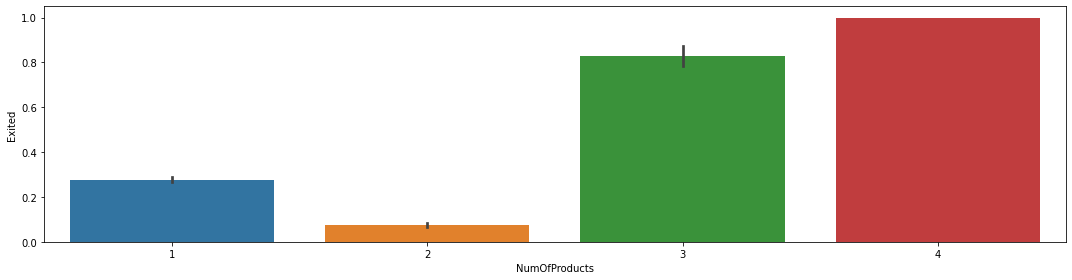

In [25]:
# Test different categorical variable relationship with Default variable - Bar Charts
for i in ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts']:
    print(i)
    print('\n')
    fig, ax = plt.subplots(figsize=(15, 4))
    sns.barplot(x=i,y='Exited',data=ds,ax=ax)
    plt.tight_layout()
    plt.show()
# Can think of changing NumProducts to Categorical

In [ ]:
# Test different categorical variable relationship with Default variable - Crosstab
for i in ['Geography','Gender','HasCrCard','IsActiveMember','NumOfProducts']:
    print(i)
    print('\n')
    print(pd.crosstab(ds[i],ds['Exited'],normalize='index').sort_values(ascending=True,by=i))
    print('\n')

Geography


Exited            0         1
Geography                    
France     0.838452  0.161548
Germany    0.675568  0.324432
Spain      0.833266  0.166734


Gender


Exited         0         1
Gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559


HasCrCard


Exited            0         1
HasCrCard                    
0          0.791851  0.208149
1          0.798157  0.201843


IsActiveMember


Exited                 0         1
IsActiveMember                    
0               0.731491  0.268509
1               0.857309  0.142691


NumOfProducts


Exited                0         1
NumOfProducts                    
1              0.722856  0.277144
2              0.924183  0.075817
3              0.172932  0.827068
4              0.000000  1.000000




Text(0.5, 1.0, 'Age')

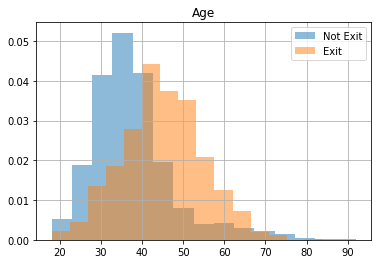

In [ ]:
# Hist plot for relationship between continous variable and default variable
ds['Age'][ds['Exited'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Exit')
ds['Age'][ds['Exited'] == 1].hist(bins=15,density=True,alpha=0.5,label='Exit')
plt.legend()
plt.title('Age')
#Age transform based on certain logical sense age buckets

Text(0.5, 1.0, 'CreditScore')

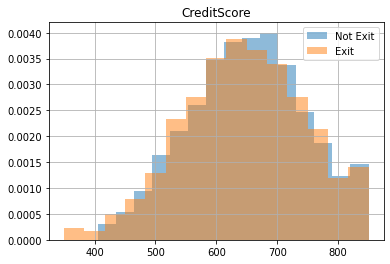

In [ ]:
# Hist plot for relationship between continous variable and default variable
ds['CreditScore'][ds['Exited'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Exit')
ds['CreditScore'][ds['Exited'] == 1].hist(bins=15,density=True,alpha=0.5,label='Exit')
plt.legend()
plt.title('CreditScore')

Text(0.5, 1.0, 'Tenure')

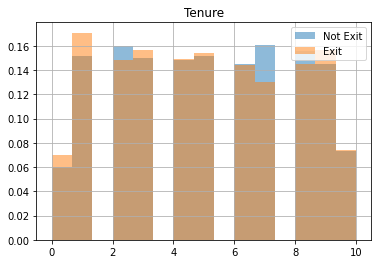

In [ ]:
# Hist plot for relationship between continous variable and default variable
ds['Tenure'][ds['Exited'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Exit')
ds['Tenure'][ds['Exited'] == 1].hist(bins=15,density=True,alpha=0.5,label='Exit')
plt.legend()
plt.title('Tenure')

Text(0.5, 1.0, 'Balance')

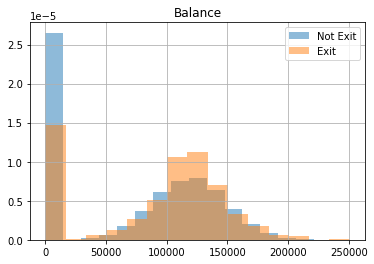

In [ ]:
# Hist plot for relationship between continous variable and default variable
ds['Balance'][ds['Exited'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Exit')
ds['Balance'][ds['Exited'] == 1].hist(bins=15,density=True,alpha=0.5,label='Exit')
plt.legend()
plt.title('Balance')

Text(0.5, 1.0, 'EstimatedSalary')

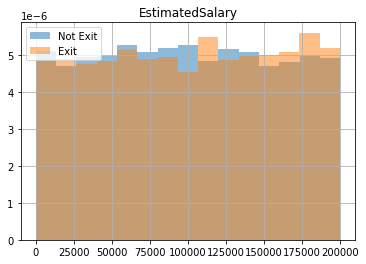

In [ ]:
# Hist plot for relationship between continous variable and default variable
ds['EstimatedSalary'][ds['Exited'] == 0].hist(bins=15,density=True,alpha=0.5,label='Not Exit')
ds['EstimatedSalary'][ds['Exited'] == 1].hist(bins=15,density=True,alpha=0.5,label='Exit')
plt.legend()
plt.title('EstimatedSalary')

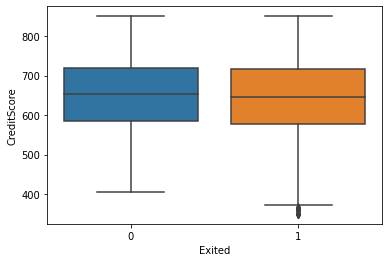

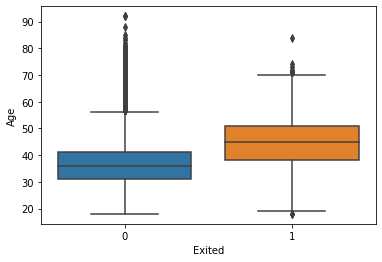

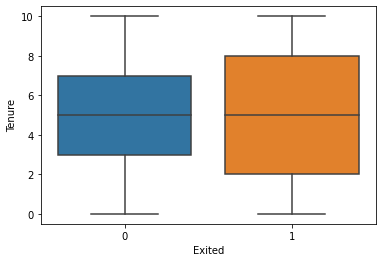

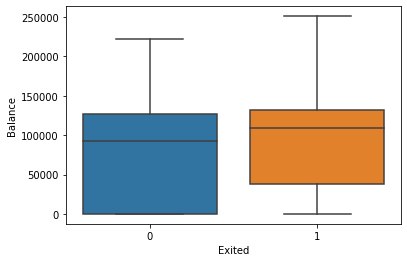

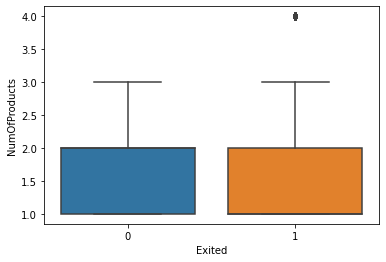

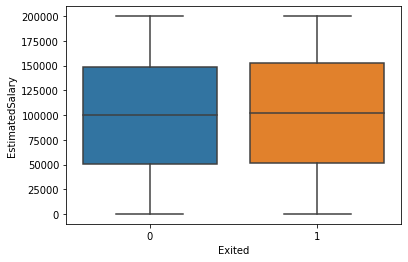

In [ ]:
# Box plot for relationship between continous variable and default variable
for i in ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']:
    sns.boxplot(x='Exited',y=i,data=ds)
    plt.show()

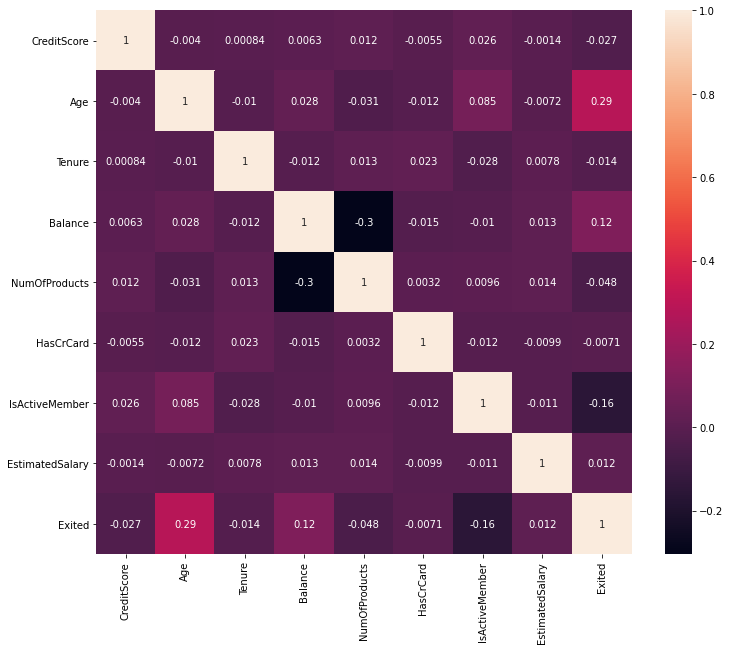

In [ ]:
#Correlation
cor = ds.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

# No stron correlations - good sense for a tree based model or NN

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

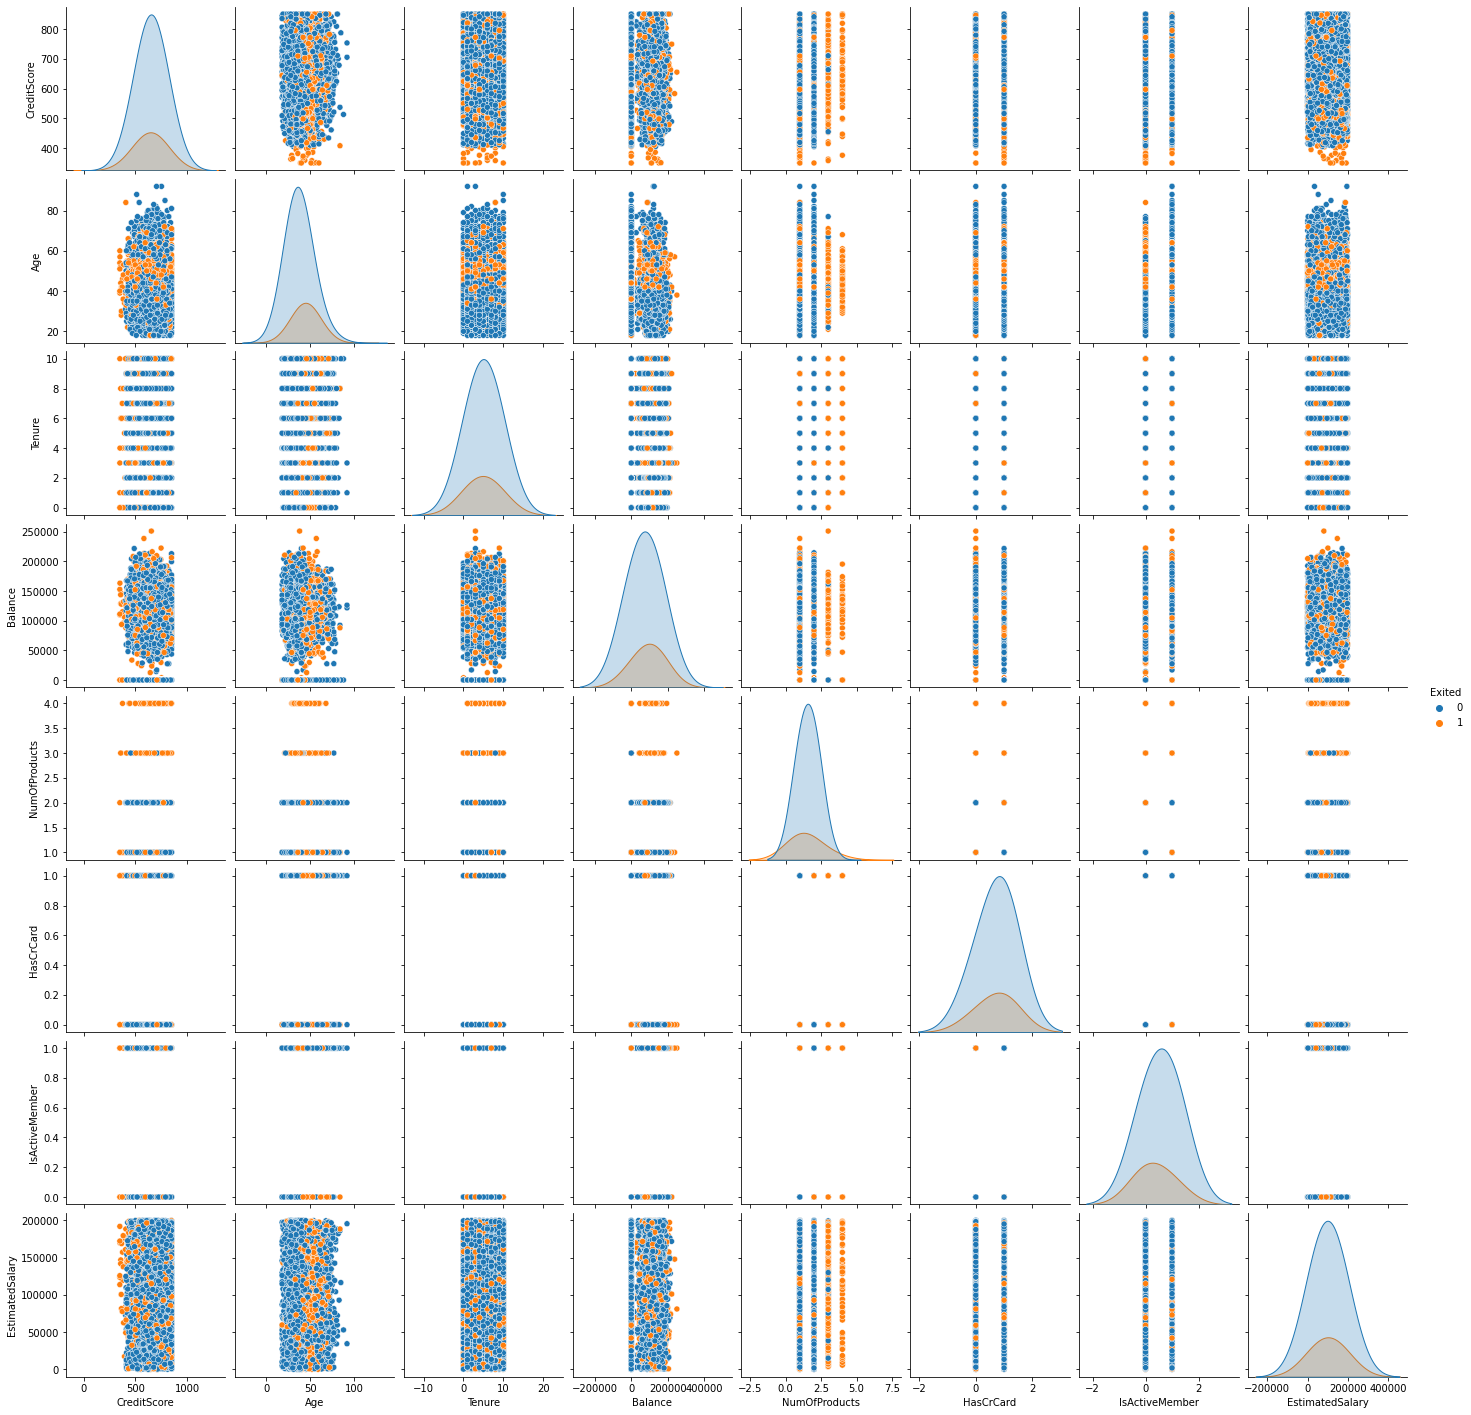

In [ ]:
sns.pairplot(ds.select_dtypes(include=['int64','float64']),hue='Exited',diag_kws={'bw':1.5})

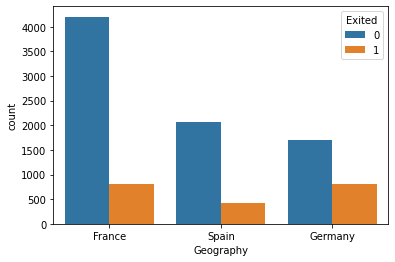

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=ds)

#### Distinguish the feature and target set

In [ ]:
ds.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
X = ds.iloc[:,0:10].values # Credit Score through Estimated Salary
y = ds.iloc[:,10].values # Exited

In [ ]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')

label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [ ]:
#countryhotencoder = OneHotEncoder(categories = [1]) # 1 is the country column
countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(), [1])], remainder="passthrough")
X = countryhotencoder.fit_transform(X)
#X = countryhotencoder.fit_transform(X).toarray()
# Column Transformer - part of preprocessor, give transformer fn and column you need to do it on, build reusable pipeline, 
#France,Spain,Germany

In [ ]:
ds.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X[:5]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [ ]:
X.shape

(10000, 11)

In [ ]:
# A 0 on two countries means that the country has to be the one variable which wasn't included 
# This will save us from the problem of using too many dimensions
X = X[:,1:] # Got rid of France as a dimension.
# Qn

In [ ]:
cols = ['Germany','Spain','CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

#### Divide the data set into Train and test sets

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#### Normalize the train and test data

In [ ]:
# Feature Scaling
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
  

#### Initialize & build the model

In [ ]:
# Initializing the ANN
classifier = Sequential()

In [ ]:
#Add Input Layer
classifier.add(Dense(activation = 'relu', input_dim = 11, units=12, kernel_initializer='uniform'))
#Add 1st hidden layer
classifier.add(Dense(6, activation='relu', kernel_initializer='uniform'))
#Add Output Layer
classifier.add(Dense(1, activation = 'sigmoid', kernel_initializer='uniform')) 

In [ ]:
# Create optimizer with default learning rate
sgd = optimizers.Adam(lr = 0.001)
# Compile the model
classifier.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision()])


In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 229
Trainable params: 229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(X_train)*.8

6400.0

In [ ]:
class1 = classifier.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=100,
          batch_size=1000)

Epoch 1/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6923 - accuracy: 0.7505 - precision: 0.1734 - val_loss: 0.6910 - val_accuracy: 0.7969 - val_precision: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.7958 - precision: 0.0000e+00 - val_loss: 0.6886 - val_accuracy: 0.7969 - val_precision: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.7958 - precision: 0.0000e+00 - val_loss: 0.6860 - val_accuracy: 0.7969 - val_precision: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.7958 - precision: 0.0000e+00 - val_loss: 0.6829 - val_accuracy: 0.7969 - val_precision: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.7958 - precision: 0.0000e+00 - val_loss: 0.6790 - val_accuracy: 0.7969 - val_precision: 0.0000e+00
Epoch 6/100
7/7 [==============================]

In [ ]:
hist1  = pd.DataFrame(class1.history)
hist1['epoch'] = class1.epoch

In [ ]:
hist1.head(5)

,loss,accuracy,precision,val_loss,val_accuracy,val_precision,epoch
0,0.692316,0.750469,0.173423,0.690955,0.796875,0.0,0
1,0.690074,0.795781,0.000000,0.688595,0.796875,0.0,1
2,0.687616,0.795781,0.000000,0.685979,0.796875,0.0,2
3,0.684870,0.795781,0.000000,0.682872,0.796875,0.0,3
4,0.681494,0.795781,0.000000,0.679009,0.796875,0.0,4


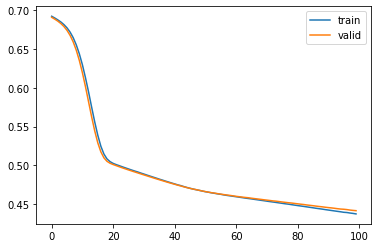

In [ ]:
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)

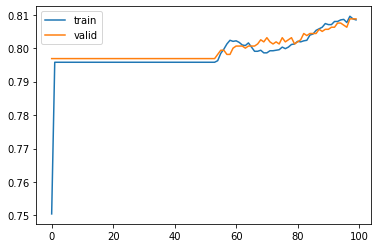

In [ ]:
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

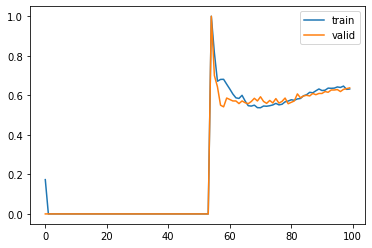

In [ ]:
plt.plot(hist1['precision'])
plt.plot(hist1['val_precision'])
plt.legend(("train" , "valid") , loc =0)

#### Predict the results using 0.5 as a threshold

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[[0.24817498]
 [0.38215777]
 [0.14340386]
 ...
 [0.21643543]
 [0.15967336]
 [0.28809342]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.
y_pred_value = (y_pred > 0.5)
print(y_pred_value)
#

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


#### Print the Accuracy score and confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_value)
print(cm1)

[[1561   34]
 [ 335   70]]


In [ ]:
accuracy_model1 = ((cm1[0][0]+cm1[1][1])*100)/(cm1[0][0]+cm1[1][1]+cm1[0][1]+cm1[1][0])
print (accuracy_model1, '% of testing data was classified correctly')
# Model really bad as predicting just 0 would get me to 80%

81.55 % of testing data was classified correctly


Instructions for updating:
Please use `model.predict()` instead.


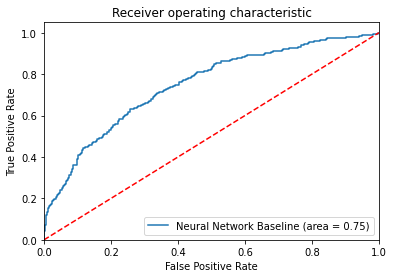

In [ ]:
#AUC ROC curve

rf_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,0])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network Baseline (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_value, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.823312,0.978683,0.894300,1595.0000
1,0.673077,0.172840,0.275049,405.0000
accuracy,0.815500,0.815500,0.815500,0.8155
macro avg,0.748195,0.575761,0.584674,2000.0000
weighted avg,0.792890,0.815500,0.768901,2000.0000


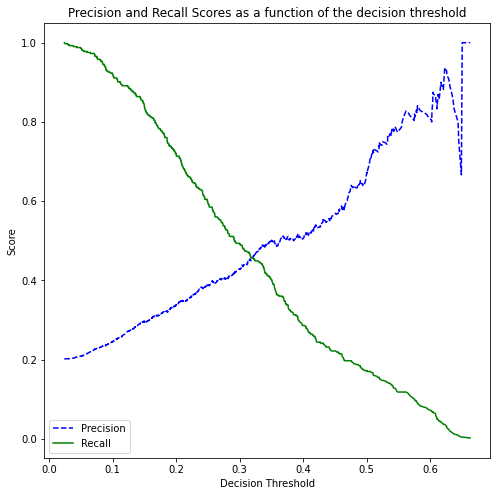

In [ ]:
from sklearn.metrics import precision_recall_curve
# How change to get higher Precision ?
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
   
# Plot precision vs recall vs threshold
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,0])
plot_precision_recall_vs_threshold(lr_precision, lr_recall, thresholds)
#Way to pick up the right Threshold Value

#### Optimize the model

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

##### Number of Layers:
We will keep it similar to the above model so that we can compare the accuracy.
1 hidden layer.

##### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ
output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

##### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficeint variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

##### Learning Rate:
default learning rate 0.001.

##### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.

##### Weight sharing / kernel_initializer: 
uniform the distribution with which we randomly initialize weights for the nodes in this layer.

##### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

Rebuilding the model using these optimised parameters

In [ ]:
def build_model(hp):
    Oclassifier = Sequential() #Start model
    Oclassifier.add(Dense(units=hp.Int('units_in',min_value=12,max_value=256,step=32),  
                    input_shape = (11,), 
                    activation = hp.Choice('act_in', ['relu', 'tanh']),
                    kernel_initializer= hp.Choice('ker_in' , ['random_normal', 'glorot_normal']),
                    bias_initializer= hp.Choice('bias_in' , ['zeros','ones', 'random_uniform'])
                    )) # Hidden Layer connected to Input Layer
    for i in range(hp.Int('num_layers', 0, 1)):
      Oclassifier.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=12,
                                            max_value=128,
                                            step=32),
                               activation=hp.Choice('act_' + str(i), ['relu', 'tanh']),
                               kernel_initializer= hp.Choice('ker_', ['random_normal', 'glorot_normal']),
                               bias_initializer= hp.Choice('bias_', ['zeros','ones', 'random_uniform'])
                            ))  # Hidden Layer
      Oclassifier.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.3))) # Drop out layer for regularization

    Oclassifier.add(Dense(1, activation='sigmoid')) # Output layer
      
    Oclassifier.compile(
         optimizer=optimizers.Adam(
             hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
             loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.AUC()])
      
    return Oclassifier

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import BayesianOptimization
tuner = BayesianOptimization(
    build_model,
    objective=kerastuner.Objective("precision", direction="max"), 
    max_trials=25,
    num_initial_points=10,
    seed=255,
    directory='Fraud_Dir',
    project_name='Fraud_Proj15')

# Performing Tuning to get best Precision values

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
units_in (Int)
{'default': None, 'conditions': [], 'min_value': 12, 'max_value': 256, 'step': 32, 'sampling': None}
act_in (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
ker_in (Choice)
{'default': 'random_normal', 'conditions': [], 'values': ['random_normal', 'glorot_normal'], 'ordered': False}
bias_in (Choice)
{'default': 'zeros', 'conditions': [], 'values': ['zeros', 'ones', 'random_uniform'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 1, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
tuner.search(X_train, y_train , epochs = 10,validation_split=0.2)

Trial 25 Complete [00h 00m 07s]
precision: 0.7436548471450806

Best precision So Far: 0.7757660150527954
Total elapsed time: 00h 03m 35s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(tuner.results_summary())

Results summary
Results in Fraud_Dir/Fraud_Proj15
Showing 10 best trials
Objective(name='precision', direction='max')
Trial summary
Hyperparameters:
units_in: 12
act_in: relu
ker_in: glorot_normal
bias_in: zeros
num_layers: 1
learning_rate: 0.01
units_0: 12
act_0: relu
ker_: random_normal
bias_: random_uniform
dropout: 0.0
Score: 0.7757660150527954
Trial summary
Hyperparameters:
units_in: 12
act_in: tanh
ker_in: glorot_normal
bias_in: zeros
num_layers: 1
learning_rate: 0.01
units_0: 108
act_0: relu
ker_: glorot_normal
bias_: random_uniform
dropout: 0.0
Score: 0.7707558870315552
Trial summary
Hyperparameters:
units_in: 12
act_in: relu
ker_in: random_normal
bias_in: random_uniform
num_layers: 0
learning_rate: 0.01
units_0: 108
act_0: relu
ker_: random_normal
bias_: zeros
dropout: 0.5
Score: 0.7690355181694031
Trial summary
Hyperparameters:
units_in: 12
act_in: relu
ker_in: glorot_normal
bias_in: zeros
num_layers: 1
learning_rate: 0.01
units_0: 12
act_0: relu
ker_: glorot_normal
bias_: ze

In [ ]:
# Best Hyperparameter model using Randomized Search CV - This can change on individual machines
print(tuner.get_best_hyperparameters()[0].values)

{'units_in': 12, 'act_in': 'relu', 'ker_in': 'glorot_normal', 'bias_in': 'zeros', 'num_layers': 1, 'learning_rate': 0.01, 'units_0': 12, 'act_0': 'relu', 'ker_': 'random_normal', 'bias_': 'random_uniform', 'dropout': 0.0}


In [ ]:
print(tuner.get_best_models()[0].summary())
#Best Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
##Callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)
#New Learning rate = Learning Rate * factor

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
model = tuner.hypermodel.build(best_hyperparameters)
class2 = model.fit(X_train, y_train,
                      epochs=100,
                      validation_split=0.2,verbose=1,callbacks=[reduce_lr])
# Use class_weight for balancing imbalanced dataset

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.7933 - precision: 0.2143 - auc: 0.6681 - val_loss: 0.4584 - val_accuracy: 0.7969 - val_precision: 0.0000e+00 - val_auc: 0.7307
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4465 - accuracy: 0.7959 - precision: 0.5185 - auc: 0.7380 - val_loss: 0.4481 - val_accuracy: 0.7969 - val_precision: 0.0000e+00 - val_auc: 0.7494
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4322 - accuracy: 0.8083 - precision: 0.6961 - auc: 0.7639 - val_loss: 0.4218 - val_accuracy: 0.8219 - val_precision: 0.7500 - val_auc: 0.7778
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8278 - precision: 0.6916 - auc: 0.7992 - val_loss: 0.3989 - val_accuracy: 0.8338 - val_precision: 0.6746 - val_auc: 0.8118
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8405 - precision: 0.

In [ ]:
hist2  = pd.DataFrame(class2.history)
hist2['epoch'] = class2.epoch

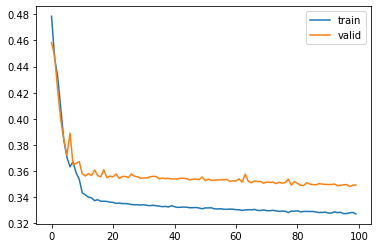

In [ ]:
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc =0)
# Perhaps Overfitting but cant do much as data volume is low to run a DNN model on a 10K row dataset

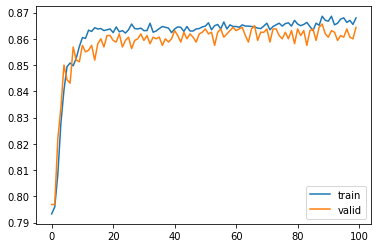

In [ ]:
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

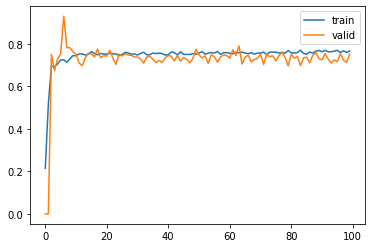

In [ ]:
plt.plot(hist2['precision'])
plt.plot(hist2['val_precision'])
plt.legend(("train" , "valid") , loc =0)

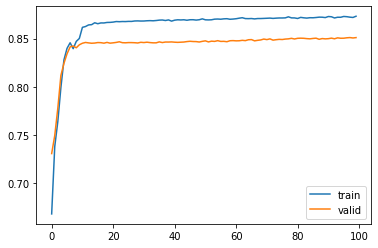

In [ ]:
plt.plot(hist2['auc'])
plt.plot(hist2['val_auc'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stopping = EarlyStopping(
#    min_delta = 0.1, # Min change count as improvement
#    patience = 20,
#    restore_best_weights =True
#)

#best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
#model = tuner.hypermodel.build(best_hyperparameters)
#class2 = model.fit(X_train, y_train,
#                      epochs=100,
#                      validation_split=0.2,verbose=1,callbacks=[reduce_lr,early_stopping])

In [ ]:
y_pred1 =  model.predict(X_test)
print(y_pred1)

[[0.2455437 ]
 [0.3587376 ]
 [0.12057612]
 ...
 [0.16638696]
 [0.1454486 ]
 [0.16885367]]


In [ ]:
y_pred_value1 = (y_pred1 > 0.5)
print(y_pred_value1)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
cm2 = confusion_matrix(y_test, y_pred_value1)
print(cm2)

[[1518   77]
 [ 197  208]]


In [ ]:
accuracy_model2 = ((cm2[0][0]+cm2[1][1])*100)/(cm2[0][0]+cm2[1][1]+cm2[0][1]+cm2[1][0])
print (accuracy_model2, '% of testing data was classified correctly')
#Overall model performs better than the baseline

86.3 % of testing data was classified correctly


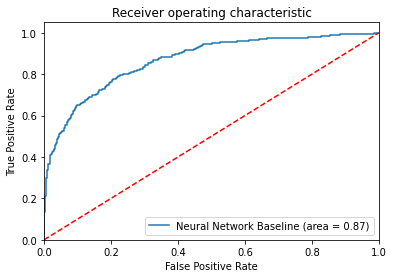

In [ ]:
#AUC ROC curve
rf_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,0])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network Baseline (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_value1, output_dict=True)).transpose()
#Higher Precision as desired

,precision,recall,f1-score,support
0,0.885131,0.951724,0.917221,1595.000
1,0.729825,0.513580,0.602899,405.000
accuracy,0.863000,0.863000,0.863000,0.863
macro avg,0.807478,0.732652,0.760060,2000.000
weighted avg,0.853682,0.863000,0.853570,2000.000


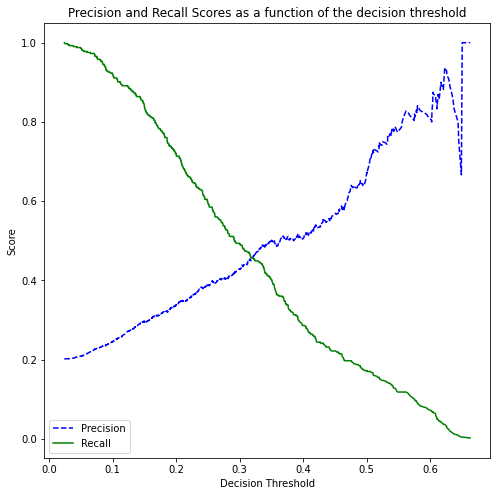

In [ ]:
from sklearn.metrics import precision_recall_curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
   
# Plot precision vs recall vs threshold
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,0])
plot_precision_recall_vs_threshold(lr_precision, lr_recall, thresholds)

In [ ]:
X_test[0]

array([1.        , 0.        , 0.494     , 0.        , 0.24285714,
       0.8       , 0.54994917, 0.        , 1.        , 1.        ,
       0.96429754])

You have provided over 5k background samples! For better performance consider using smaller random sample.


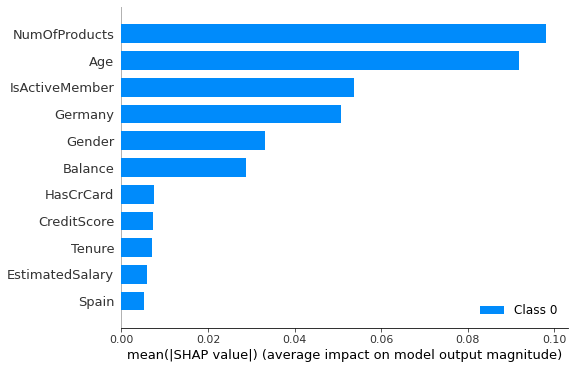

In [ ]:
## Explain Model Better using Shap
import shap
shap.initjs()
explainer = shap.DeepExplainer(model, X_train) # 
shap_values = explainer.shap_values(X_test)# X_test[:1000]
shap.summary_plot(shap_values, pd.DataFrame(X_test,columns=cols), plot_type='bar')
#Num of Products and age key factors in Churn as add on insights

In [ ]:
# Compare run with Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Initiate Random Forest Model
rfcl = RandomForestClassifier(n_estimators = 50,oob_score=True,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
# Make predictions and calculate accuracy
y_predict = rfcl.predict(X_test)

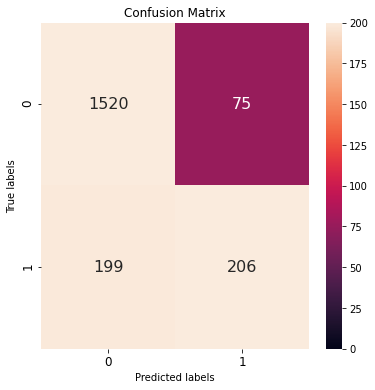

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1'],fontsize=12);

In [ ]:
print("Training Accuracy",rfcl.score(X_train, y_train))
print("Testing Accuracy",rfcl.score(X_test, y_test))
print("Recall",recall_score(y_test,rfcl.predict(X_test)))
print("Precision",precision_score(y_test,rfcl.predict(X_test)))
print("ROC AUC Curve",roc_auc_score(y_test,rfcl.predict(X_test)))
# A simple RF Model does well than a Deep Neural Network with Optimization

Training Accuracy 0.9995
Testing Accuracy 0.863
Recall 0.508641975308642
Precision 0.7330960854092526
ROC AUC Curve 0.7308100158674872


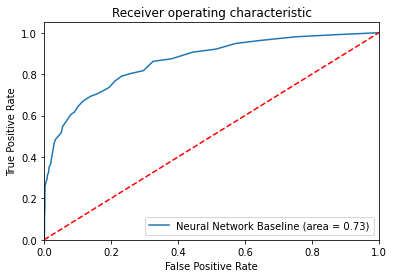

In [ ]:
#AUC ROC curve
rf_roc_auc = roc_auc_score(y_test, rfcl.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfcl.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network Baseline (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

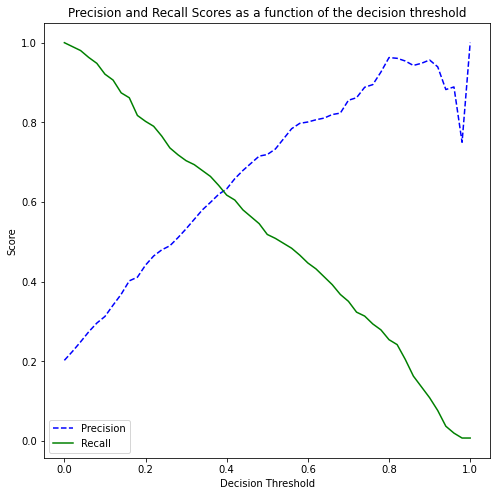

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
   
# Plot precision vs recall vs threshold
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, rfcl.predict_proba(X_test)[:,1])
plot_precision_recall_vs_threshold(lr_precision, lr_recall, thresholds)

In [ ]:
# Handle Imbalanced Datasets with class weights that you can provide when fitting a Keras Model above
import sklearn
weights = sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(ds['Exited']), ds['Exited'])
print(weights)

[0.62790406 2.45459008]


#### The optimised model gives better results as seen from the confusion matrix as well as improved accuracy.


We encourage the learners to further look for optimizing the model and come up with better results.

#### Happy Learning!

In [ ]:
# Randomly pick some observations - Ignore
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S